#**LOGISTIC REGRESSION MODEL TRAINING**


> In this notebook the Logisitc Regresson model was trained based on Attack class 19 Input and the evalation of the model has been done using several evalustion techniques.






## **Importing Required Libraries**

In [ ]:
!pip install tensorflow
!pip install psutil
!pip install joblib
!pip install scikit-learn
!pip install seaborn
!pip install matplotlib
!pip install pandas
!pip install numpy
!pip install tqdm
!pip install keras
!pip install sklearn
!pip install time
!pip install json

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
ERROR: Could not find a version that satisfies the requirement time (from versions: none)
ERROR: No matching distribution found for time
ERROR: Could not find a version that satisfies the requirement json (from versions: none)
ERROR: No matching distribution found for json


In [ ]:
import gc
import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from keras.utils import to_categorical
import os
import joblib
import pandas as pd
from sklearn.metrics import log_loss
import time
import json

## Logistic Regression Model Creation and Training

*   Importing the preprocessed and reshaped dataset from the local directory
*   Defining the Logistic Regression Model.
*   Training the Logistic Regression model.

In [ ]:
file_path = "<preprocessedrnn_data.npz file location for Class 19>"
# file_path = "/content/drive/MyDrive/AI_and_sustainability/AI_and_Sus_Final/Models_and_Result/Class_19/Preprocessed data/preprocessed_logistic_data19.npz"

In [ ]:
save_path = "<Enter the save path>"
# save_file = "/content/drive/MyDrive/AI_and_sustainability/AI_and_Sus_Final/Models_and_Result/Class_19/Result"

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Logistic Regression Model
def create_logistic_regression_model():
    """Create a Logistic Regression model."""
    model = LogisticRegression(max_iter=1000, multi_class='ovr', solver='lbfgs')
    return model

# Training the model
def train_logistic_regression_model(model, X_train, y_train_encoded, X_val, y_val_encoded):
    """Train Logistic Regression model."""
    model.fit(X_train, y_train_encoded)
    y_val_pred = model.predict(X_val)

    print("Validation Accuracy:", accuracy_score(y_val_encoded, y_val_pred))
    print("Classification Report (Validation Data):")
    print(classification_report(y_val_encoded, y_val_pred))

    return model

# Load preprocessed data
data = np.load(file_path, allow_pickle=True)

# Retrieving the preprocessed data
X_train1 = data["X_train1"]
X_val1 = data["X_val1"]
X_test = data["X_test1"]
y_train = data["y_train"]
y_val = data["y_val"]
y_test = data["y_test"]
label_classes = data["label_classes"]

X_train = X_train1.reshape(X_train1.shape[0], -1)
X_val = X_val1.reshape(X_val1.shape[0], -1)

# Create and train the logistic regression model
log_reg_model = create_logistic_regression_model()
train_logistic_regression_model(
    log_reg_model,
    X_train,
    y_train.argmax(axis=1),
    X_val,
    y_val.argmax(axis=1)
)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Validation Accuracy: 0.7844015397645666
Classification Report (Validation Data):
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     38516
           1       0.79      0.99      0.88    307596
           2       0.82      0.91      0.86    160295
           3       0.68      0.99      0.81    160642
           4       0.78      0.97      0.86    327051
           5       0.50      0.02      0.04     83051
           6       0.81      0.66      0.72     88907
           7       0.63      0.02      0.03     76055
           8       0.70      0.21      0.33    113465
           9       1.00      1.00      1.00     34819
          10       0.99      1.00      0.99      5545
          11       0.99      1.00      0.99      2527
          12       0.99      1.00      1.00      8870
          13       0.99      0.99      0.99       992
          14       0.84      0.35      0.49      3322
          15       1.00      0.95      0.98       154


LogisticRegression(max_iter=1000, multi_class='ovr')

## Result Analysis

*   In this section the result has been analysed with the help various evalution matrices.
*   Several graphical representation of the results has been done.


### Calculating Loss, Accuracy, and Classification Report

In [ ]:
# Flatten X_test before passing it to the model
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Predict probabilities for log loss
y_test_pred_prob = log_reg_model.predict_proba(X_test_flat)

# Log loss computation (cross-entropy loss)
loss = log_loss(y_test, y_test_pred_prob)
print(f"\nLogistic Regression Test Loss (Cross-Entropy Loss): {loss:.4f}")

# Predict class labels
y_test_pred = log_reg_model.predict(X_test_flat)

# True labels (convert from one-hot)
y_test_true_encoded = np.argmax(y_test, axis=1)

# Accuracy
accuracy = accuracy_score(y_test_true_encoded, y_test_pred)
print(f"Test Accuracy: {accuracy:.4f}")

# Classification Report
print("Classification Report (Test Data):")
print(classification_report(y_test_true_encoded, y_test_pred))



Logistic Regression Test Loss (Cross-Entropy Loss): 1.5416
Test Accuracy: 0.7446
Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.95      1.00      0.98     37607
           1       0.78      1.00      0.88    349699
           2       0.88      1.00      0.93    172397
           3       0.69      1.00      0.82    182598
           4       0.73      0.97      0.83    362070
           5       0.53      0.01      0.01     98432
           6       1.00      0.77      0.87     98595
           7       0.62      0.01      0.02     82096
           8       0.34      0.04      0.07    137553
           9       0.00      0.00      0.00     41916
          10       0.00      0.00      0.00      8416
          11       1.00      1.00      1.00      3131
          12       0.00      0.00      0.00      8505
          13       0.03      0.95      0.05      1747
          14       0.89      0.38      0.54      3834
          15      

### Confusion Matrix


Confusion Matrix:
 [[ 37520      0      1      7      0     11     11      2      7      3
       0      0      1      1     16      0     16      0     11]
 [    94 348960      0      0      1    634      1      0      2      0
       0      0      0      0      0      0      7      0      0]
 [    22      0 171889    105      0      2      0    184      1      0
       0      1      0      0     52      0      5     76     60]
 [     0      0      2 182276      0      0      0    261      0      0
       0      0      0      0     56      0      1      0      2]
 [     2      9      0      1 352070      1      0      0   9972      0
       0      0      0      0      2      0      2     11      0]
 [   215  97480      0      0      3    731      0      0      1      0
       0      0      0      0      0      0      2      0      0]
 [     1      0  22635      0      0      0  75836      0      0     10
       0      0      0      0     28      0     82      3      0]
 [     0      

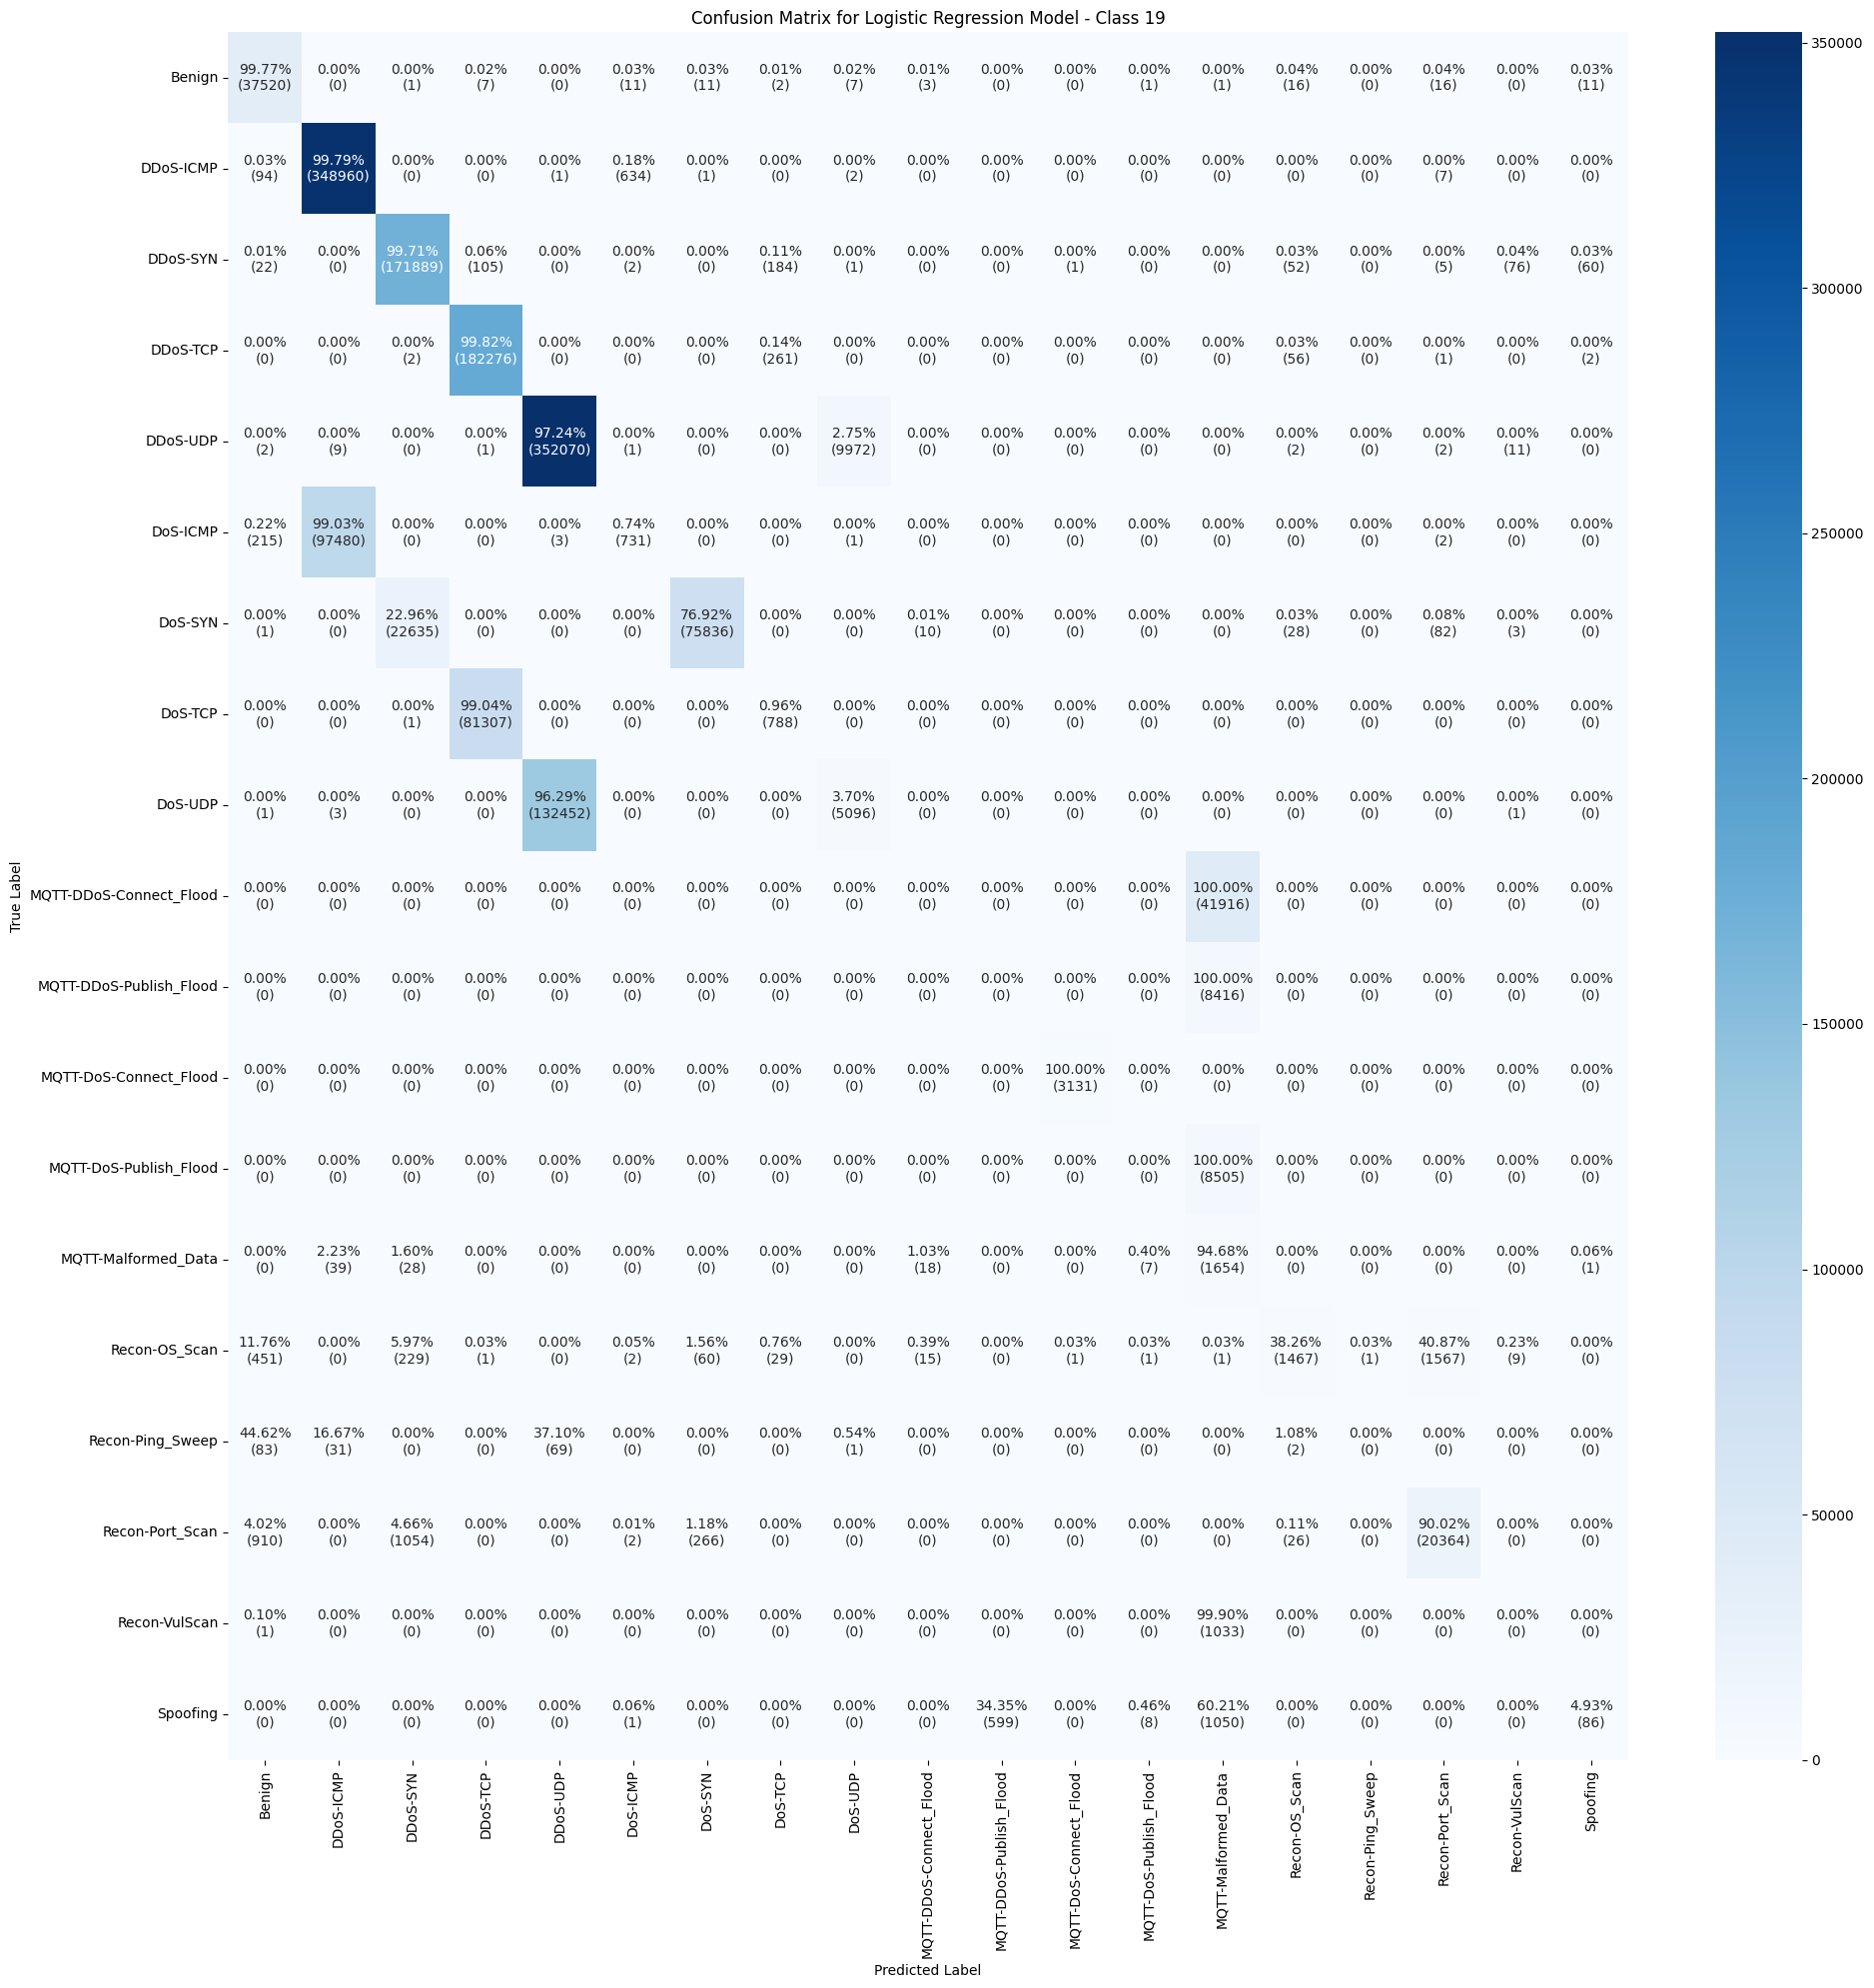

In [ ]:
# Load label_classes from preprocessing file
label_classes = data["label_classes"]

# Compute the confusion matrix
cm = confusion_matrix(y_test_true_encoded, y_test_pred)
print("\nConfusion Matrix:\n", cm)
print("\n \n")

# Normalize the confusion matrix by rows (i.e., true labels)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Prepare annotations with both counts and percentages
annot = np.empty_like(cm, dtype=object)
row_sums = cm.sum(axis=1)

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        count = cm[i, j]
        total = row_sums[i]
        percent = cm_normalized[i, j] * 100 if total != 0 else 0
        annot[i, j] = f"{percent:.2f}%\n({count})" if total != 0 else "—"

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(cm,
            annot=annot,
            fmt='',
            cmap='Blues',
            xticklabels=label_classes,
            yticklabels=label_classes)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Logistic Regression Model - Class 19')
plt.tight_layout()
plt.show()


## Evaluating and Saving the Model

*   Saving the evaluated model as.json file for future analysis



In [ ]:
# Save the model
model_filename = 'Logistic_19.h5'

# Save the model to a specific path on Google Drive
full_save_path = os.path.join(save_file, model_filename)

# Save the model
joblib.dump(log_reg_model, full_save_path)

['/content/drive/MyDrive/AI_and_sustainability/AI_and_Sus_Final/Models_and_Result/Class_19/Result/Logistic_19.h5']

In [ ]:
# Evaluate the model and save detailed metrics for comparison
def evaluate(model, X_test, y_test, save_path, model_name):

    # Record the start time of evaluation
    start_eval = time.time()

    # Make predictions
    y_pred = model.predict(X_test_flat)
    accuracy = np.mean(y_pred == y_test)  # Accuracy calculation for logistic regression

    # Record the end time and calculate how long evaluation took
    end_eval = time.time()
    eval_time = end_eval - start_eval

    # Classification Metrics
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Store all results in a dictionary
    results = {
        "model_name": "Logistic Regression",  # Update with your model name if needed
        "accuracy": float(accuracy),
        "precision": float(precision),
        "recall": float(recall),
        "f1_score": float(f1),
        "loss": float(loss),
        "evaluation_time_sec": float(eval_time),
        "confusion_matrix": conf_matrix.tolist(),
        "true_labels": y_test.tolist(),
        "predicted_labels": y_pred.tolist()
    }

    # Save results to JSON
    with open(save_path, "w") as f:
        json.dump(results, f)

    print(f"Results saved successfully to {save_path}")

file_name = "results_regression19.json"
save_path = os.path.join(save_file, file_name)

# Model evaluation and saving results
evaluate(
    model=log_reg_model,
    X_test=X_test,
    y_test=y_test.argmax(axis=1),
    model_name="Logistic Regression",# Ensure y_test is in class indices
    save_path=save_path
)

Results saved successfully to /content/drive/MyDrive/AI_and_sustainability/AI_and_Sus_Final/Models_and_Result/Class_19/Result/results_regression19.json
